In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import imageio.v3 as iio
from matplotlib.colors import Normalize

from metaparc.data.ind_datasets import TurbulentRadiativeDataset, ComsolHeatedFlowDataset

In [ ]:
def find_csv_files_without_word(directory_path, excluded_word):
    """
    Find all CSV files in a directory that do not contain a specific word in their filename.
    
    Parameters
    ----------
    directory_path : str or Path
        Path to the directory to search in
    excluded_word : str
        Word to exclude from filenames
        
    Returns
    -------
    list
        List of Path objects for CSV files that don't contain the excluded word
    """
    # Convert to Path object if string is provided
    directory = Path(directory_path) if isinstance(directory_path, str) else directory_path
    
    # Find all CSV files
    all_csv_files = list(directory.glob("**/*.csv"))
    
    # Filter out files containing the excluded word
    filtered_files = [file for file in all_csv_files if excluded_word.lower() not in file.name.lower()]
    
    return filtered_files

def rename_file(file_path, inserted_word, keep_extension=True):
    """
    Rename a file with a new name.
    
    Parameters
    ----------
    file_path : str or Path
        Path to the file to be renamed
    inserted_word : str
        Word to insert into the filename    
    keep_extension : bool, optional
        Whether to keep the original file extension (default True)
        
    Returns
    -------
    Path
        New Path object with the renamed file
    
    Examples
    --------
    >>> rename_file('data/old_file.csv', 'new_file')
    Path('data/new_file.csv')
    
    >>> rename_file('data/old_file.csv', 'new_file.txt', keep_extension=False)
    Path('data/new_file.txt')
    """
    # Convert to Path object if string is provided
    file_path = Path(file_path) if isinstance(file_path, str) else file_path
    
    # Get directory and extension
    directory = file_path.parent
    extension = file_path.suffix
    name = file_path.stem

    # Find all underscores
    underscores = [i for i, c in enumerate(name) if c == '_']

    # insert the word after the 4th underscore
    new_name = name[:underscores[3]] + inserted_word + name[underscores[3]:]
    
    # Add the extension back
    new_filename = new_name + extension


    # Create the new path
    new_path = directory / new_filename
    
    # print(new_path)
    # Actually rename the file using pathlib
    # file_path.rename(new_path)
    

path = Path(r"C:\Users\zsa8rk\Downloads\vel_x")
excluded_word = "r_heat"

for file in find_csv_files_without_word(path, excluded_word):
    rename_file(file, "_r_heat_0.05")


In [31]:
def rename_file(file_path):
    """
    Rename a file with a new name.
    
    Parameters
    ----------
    file_path : str or Path
        Path to the file to be renamed
    inserted_word : str
        Word to insert into the filename    
    keep_extension : bool, optional
        Whether to keep the original file extension (default True)
        
    Returns
    -------
    Path
        New Path object with the renamed file
    
    Examples
    --------
    >>> rename_file('data/old_file.csv', 'new_file')
    Path('data/new_file.csv')
    
    >>> rename_file('data/old_file.csv', 'new_file.txt', keep_extension=False)
    Path('data/new_file.txt')
    """
    # Convert to Path object if string is provided
    file_path = Path(file_path) if isinstance(file_path, str) else file_path
    
    # Get directory and extension
    directory = file_path.parent
    extension = file_path.suffix
    name = file_path.stem

    # Find all underscores
    underscores = [i for i, c in enumerate(name) if c == '_']

    # insert the word after the 4th underscore
    number = name[underscores[6]+1:underscores[7]]
    # remove number from name
    name = name[:underscores[6]] + name[underscores[7]:]
    # insert number after the 3rd underscore
    new_name = name[:underscores[3] +1] + number + "_" + name[underscores[3] +1:]
    
    # Add the extension back
    new_filename = new_name + extension


    # Create the new path
    new_path = directory / new_filename
    
    # print(new_path)
    # Actually rename the file using pathlib
    # file_path.rename(new_path)
    

path = Path(r"C:\Users\zsa8rk\Downloads\vel_x")
files = path.glob("**/*.csv")


for file in files:
    rename_file(file)


In [ ]:
# def print_attrs(name, obj):
#     print(name)
#     for key, val in obj.attrs.items():
#         print("    %s: %s" % (key, val))

#     # add scalar values to the input fields
# data_path = Path(r"C:\Users\zsa8rk\Coding\MetaPARC\data\datasets\object_periodic_flow_water/data")
    
# for file in data_path.glob("**/*.hdf5"):
#     print(file)
#     with h5py.File(file, 'r+') as f:
#         # for key, val in f.attrs.items():
#         #     print(key, val)
#         # f.visititems(print_attrs)


#         # give correct name to the file
#         f.attrs["dataset_name"] = "COMSOL_ObjectPeriodicFlowWater"

#         # # get the Re and cyl_dia from the attrs
#         # Re = f.attrs["Re"]
#         # cyl_dia = f.attrs["cyl_dia"]

#         # get the vel_in from the attrs
#         vel_in = f.attrs["inlet_vel"]

#         scalars = f["scalars"]

#         if "inlet_vel" not in scalars.keys():
#             vel_in_dset = scalars.create_dataset("inlet_vel", data=vel_in)
#             vel_in_dset.attrs["sample_varying"] = False
#             vel_in_dset.attrs["time_varying"] = False

#         # # if "Re" not in scalars.keys():
#         # #     Re_dset = scalars.create_dataset("Re", data=Re)
#         #     Re_dset.attrs["sample_varying"] = False
#         #     Re_dset.attrs["time_varying"] = False

#         # if "cyl_dia" not in scalars.keys():
#         #     cyl_dia_dset = scalars.create_dataset("cyl_dia", data=cyl_dia)
#         #     cyl_dia_dset.attrs["sample_varying"] = False
#         #     cyl_dia_dset.attrs["time_varying"] = False

In [ ]:
# Load HDF5 file
data_path = Path(r"C:\Users\zsa8rk\Coding\MetaPARC\data\datasets\object_periodic_flow_water\data\object_perio_flow_vel_1.5_2.hdf5")
# data_path = Path(r"C:\Users\zsa8rk\Coding\MetaPARC\data\datasets\cylinder_wall_flow\data\cylinder_wall_flow_Re_300.0_cyl_dia_0.3.hdf5")  # Adjust path as needed
with h5py.File(data_path, 'r') as f:
    vel = f["t1_fields"]['velocity'][:]  # Shape assumed to be (n_traj, time, height, width, 2)
    p = f["t0_fields"]['pressure'][:]

print(vel.shape)
print(p.shape)

In [2]:
# Load Well Dataset
path = Path(r"C:\Users\zsa8rk\Coding\MetaPARC\data\datasets\heated_object_pipe_flow_air\data")
dataset = ComsolHeatedFlowDataset(path, n_steps_input=100)

metadata = dataset.metadata
print(metadata)

x,y = dataset[0]

WellMetadata(dataset_name='COMSOL_HeatedFlow_Air', n_spatial_dims=2, spatial_resolution=(256, 128), scalar_names=[], constant_scalar_names=['inlet_vel', 'radius_heater', 'dT'], field_names={0: ['pressure', 'density', 'temperature'], 1: ['velocity_x', 'velocity_y'], 2: []}, constant_field_names={0: [], 1: [], 2: []}, boundary_condition_types=['open', 'wall'], n_files=2, n_trajectories_per_file=[6, 6], n_steps_per_trajectory=[501, 501], grid_type='cartesian')


In [19]:
pressure = x[..., 0]
density = x[..., 1]
temperature = x[..., 2]
vel_x = x[..., 3]
vel_y = x[..., 4]

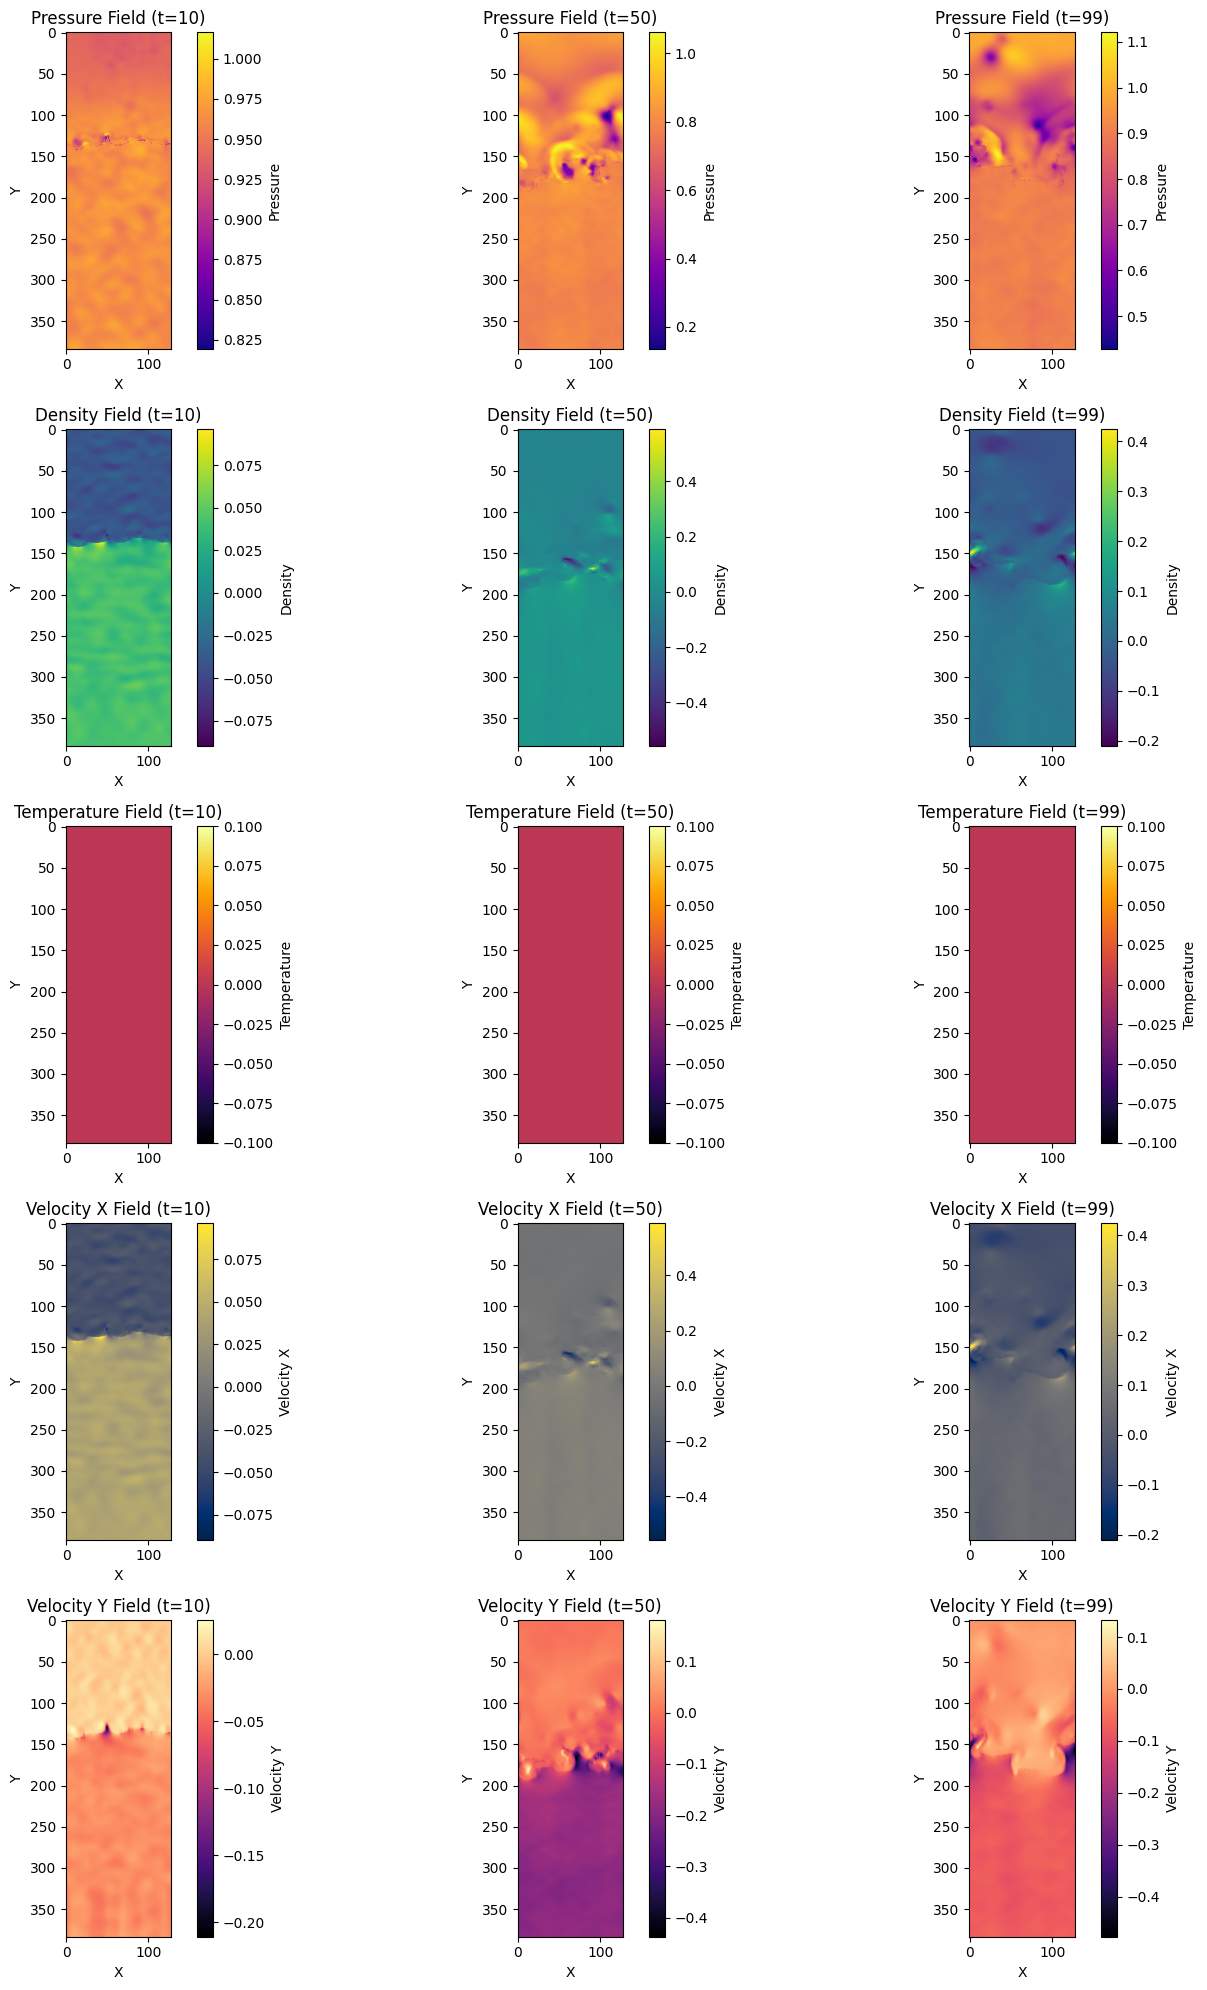

In [21]:
time_idx = [10, 50, 99]
# Create figure with subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Plot all five physical fields for each timestep
field_names = ['Pressure', 'Density', 'Temperature', 'Velocity X', 'Velocity Y']
field_data = [pressure, density, temperature, vel_x, vel_y]
cmaps = ['plasma', 'viridis', 'inferno', 'cividis', 'magma']

for row, (field, name, cmap) in enumerate(zip(field_data, field_names, cmaps)):
    for col, t in enumerate(time_idx):
        im = axes[row, col].imshow(field[t,...], cmap=cmap)
        plt.colorbar(im, ax=axes[row, col], label=name)
        
        # Add labels and title
        axes[row, col].set_xlabel('X')
        axes[row, col].set_ylabel('Y')
        axes[row, col].set_title(f'{name} Field (t={time_idx[col]})')

plt.tight_layout()
plt.show()


In [ ]:
traj_idx = 0
vel_mag = np.linalg.norm(vel[traj_idx, :, :, :, :], axis=-1)

# reduce dim with size 1 to 0
vel_mag = np.squeeze(vel_mag)

# transpose x and y
vel_mag = np.transpose(vel_mag, (0,  2, 1))

# Create normalized colormap for consistent color scaling
norm = Normalize(vmin=vel_mag.min(), vmax=vel_mag.max())

# Create frames
frames = []
for t in range(vel_mag.shape[0]):
    # Create figure and plot
    fig, ax = plt.subplots()
    im = ax.imshow(vel_mag[t,:,:])#, norm=norm)
    plt.colorbar(im)
    ax.set_title(f'Time step {t}')
    
    # Convert plot to image array
    fig.canvas.draw()
    frame = np.frombuffer(fig.canvas.buffer_rgba(), dtype=np.uint8)
    frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (4,))[:,:,:3]
    frames.append(frame)
    plt.close()

# Save as GIF
output_path = data_path.parent
output_path = output_path / (str(data_path.stem) + "_vel.gif")
print(f"Writing {len(frames)} frames to {output_path}")
iio.imwrite(output_path, frames, fps=30)
print(f"Animation saved to {output_path}")